# MACHINE LEARNING

El *machine learning* es una rama de la inteligencia artificial que permite a las computadoras aprender patrones a partir de datos y tomar decisiones sin ser programadas explícitamente para cada tarea. Su importancia radica en la capacidad de automatizar procesos complejos, descubrir información oculta en grandes volúmenes de datos y mejorar continuamente a medida que se dispone de más información.

Existen diversos métodos de aprendizaje, como el aprendizaje supervisado, no supervisado y por refuerzo, cada uno adecuado para diferentes tipos de problemas. El uso de estos métodos ha revolucionado áreas como la medicina, la industria, el comercio y la ciencia, permitiendo desde diagnósticos médicos más precisos hasta recomendaciones personalizadas en plataformas digitales.

"El aprendizaje automatico es un subdominio de la IA que proporciona a los sistemas la capacidad de aprender y mejorar automaticamente a partir de la experiencia *sin ser programados explicitamente*. Se basa en la hipotesis subyasente de crear el modelo y tratar de *mejorar ajustando mas datos en el modelo a lo largo del tiempo*"

1. Analisis de problema
2. Creacion de reglas
3. Evaluacion
    * Correcto: Puesta en produccion 
    * Incorrecto: Analisis de errores 1

Con machine learning se agrega el bloque datos que maneja cantidades de datos, entrenando al algoritmo para entender una serie de reglas que pueden permitir automatizar y arreglar, mantener predicciones y solucion de problemas.

Un ejemplo es el tratado de mensajes de spam

![1. Analisis](Images/1.analysis.png)

Al principio como se ve, una analista estudia los mensajes y los patrones que pueden llegar a tener de forma demorada como tediosa.

![2. Analisis ML](Images/2.analysisml.png)

Al usar datos en gran magnitud con diversas similitudes y creando un algoritmo que entienda esas similitudes y permita automatizar el proceso mejora completamente el problema.

![3. Pos analisis ML](Images/3.posanalisisml.png)

Pero ahora hay un problema en termino de datos, porque al pasar el tiempo los datos no son los mismos y se tienen que actualizar los datos.

## CUANDO USAR MACHINE LEARNING

* En soluciones que funcionan mediante un conjunto extenso de reglas o heuristicas.
* En problemas complejos en los que un analista no es capaz de determinar una solucion a partir de informacion existente.
* En entornos que fluctuan o varian con frecuencia
* Apoyo de la fase de analisis en enfoques tradicionales en los que se dispone de conjuntos de datos muy grandes y dificiles de interpretar.

## CLASIFICACION DE SISTEMAS ML

* En funcion de la manera en la que se entrenan:
    * Aprendizaje supervisado
    * Aprendizaje no supervisado
    * Aprendizaje semi-supervisado
    * Aprendizaje reforzado
* En funcion de la manera en la que aprenden en el tiempo:
    * Aprendizaje online
    * Aprendizaje batch
* En funcion de la forma en la que realizan las predicciones:
    * Aprendizaje basado en instancias
    * Aprendizaje basado en modelos

Estas categorias no son excluyentes unas de otras.

### APRENDIZAJE SUPERVISADO

* "El aprendizaje supervisado es la tarea de aprendizaje automático que consiste en aprender una función que mapea una entrada a una salida basada en pares de entrada-salida de ejemplo"

* La función resultante es utilizada posteriormente para predecir valores a partir de ejemplos de datos no etiquetados

![supervisado1](Images/Supervisado1.png)

Para poder construir el modelo necesita pares entrada salida o sea **etiquetado**, haciendo de manera explicita los datos cuales son los reales y cuales no son reales o cuales son las diferencias importantes entre ambos para categorisar y que el modelo entienda y construya el algoritmo (__Funcion Hipotesis__)

#### Regresion

Intenta predecir valores continuos, quiere decir que se encontrara en un fango muy largo de valores.

Por ejemplo, nosotros tenemos un conjunto de datos etiquetado de un conjunto de insidentes extrayendo caracteristicas importantes como el numero de PC afectados con el coste del insidente.

    PC afectado  Coste Incidente
0             1               74
1             2               94
2             3              182
3             4              276
4             5              239
5             6              289
6             7              428
7             8              438
8             9              427
9            10              527
10           11              527
11           12              577
12           13              662
13           14              605
14           15              664
15           16              772
16           17              800
17           18              915
18           19              905
19           20              930


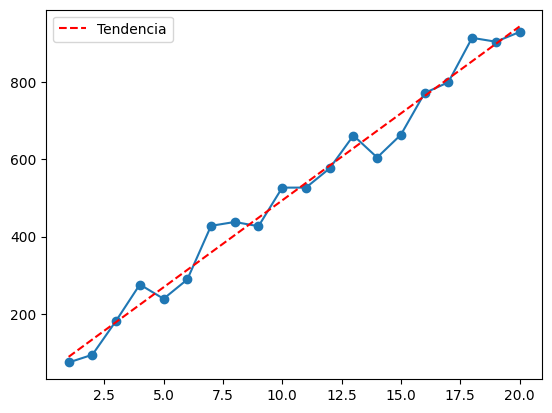

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generar valores aleatorios con tendencia lineal
np.random.seed(42)
pc = {
    'PC afectado': pd.Series(np.arange(1, 21)),
    'Coste Incidente': pd.Series(50 * np.arange(1, 21) + np.random.normal(0, 50, 20).astype(int))
}

df = pd.DataFrame(pc)
print(df)
plt.plot(df['PC afectado'], df['Coste Incidente'], marker='o')
# Calcular la línea de tendencia (regresión lineal)
z = np.polyfit(df['PC afectado'], df['Coste Incidente'], 1)
p = np.poly1d(z)
plt.plot(df['PC afectado'], p(df['PC afectado']), color='red', linestyle='--', label='Tendencia')
plt.legend()
plt.show()

#### Clasificacion

Intenta predecir valores discretos y por tanto se encuentra en un rango acotado.

Un algoritmo de ML no entende un correo como tal y por tanto hay que extraer caracteristicas como etiqueta de spam y no spam como tags html (1 spam, 0 no spam).

Entonces se contruye una hipotesis para entender las caracteristicas y por ende es mejora traer aun mas caracteristicas.

       Correo  Num Tags HTML  Num Idiomas  Es Spam
0    Correo_1              7            4        1
1    Correo_2              3            4        1
2    Correo_3              3            3        0
3    Correo_4              1            4        1
4    Correo_5              7            3        1
5    Correo_6              6            2        1
6    Correo_7              5            3        1
7    Correo_8              4            3        0
8    Correo_9              2            4        1
9   Correo_10              6            4        1
10  Correo_11              6            1        1
11  Correo_12              3            1        0
12  Correo_13              7            2        1
13  Correo_14              1            1        0
14  Correo_15              1            3        0
15  Correo_16              4            4        1
16  Correo_17              3            1        0
17  Correo_18              6            1        1
18  Correo_19              5   

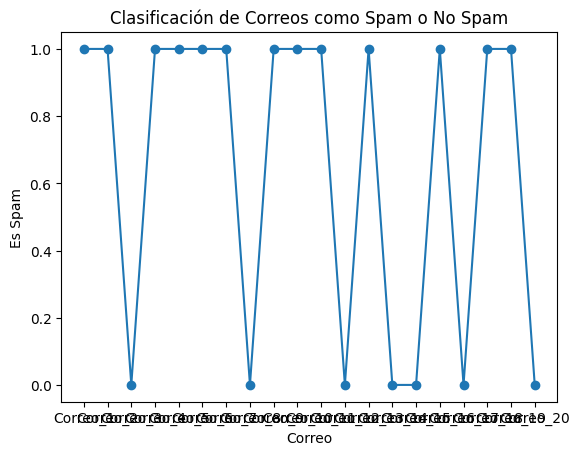

In [13]:
# Crear un dataframe con 20 correos, número de tags html, número de palabras de idiomas y predicción de spam
correos = [f'Correo_{i+1}' for i in range(20)]
num_tags = np.random.randint(1, 8, size=20)
num_idiomas = np.random.randint(1, 6, size=20)

df_spam = pd.DataFrame({
    'Correo': correos,
    'Num Tags HTML': num_tags,
    'Num Idiomas': num_idiomas
})

# Si Num Tags HTML > 4 o Num Idiomas > 3 => Spam (1), sino No Spam (0)
df_spam['Es Spam'] = ((df_spam['Num Tags HTML'] > 4) | (df_spam['Num Idiomas'] > 3)).astype(int)

df = pd.DataFrame(df_spam)
print(df)

plt.plot(df['Correo'], df['Es Spam'],marker='o')
plt.xlabel('Correo')
plt.ylabel('Es Spam')
plt.title('Clasificación de Correos como Spam o No Spam')
plt.show()

### APRENDIZAJE NO SUPERVISADO

"El aprendizaje automático no supervisado es la tarea de aprendizaje automático que consiste en inferir una función que *describe la estructura de de un conjunto de datos sin etiquetar* (es decir, datos que no se han clasificado ni categorizado)"

Se recibe un conjunto de datos sin definirle a que categorian pertenecen osea sin etiquetar y se genera una funcion hipotesis construyendo grupos de datos con caracteristicas que el modelo entiende hay.

In [14]:
df_igual = pd.DataFrame({
    'ID': range(1, len(num_tags) + 1),
    '# Tags HTML': num_tags,
    '# Idiomas': num_idiomas,
    'Es Spam': df['Es Spam']
})
print(df_igual)

    ID  # Tags HTML  # Idiomas  Es Spam
0    1            7          4        1
1    2            3          4        1
2    3            3          3        0
3    4            1          4        1
4    5            7          3        1
5    6            6          2        1
6    7            5          3        1
7    8            4          3        0
8    9            2          4        1
9   10            6          4        1
10  11            6          1        1
11  12            3          1        0
12  13            7          2        1
13  14            1          1        0
14  15            1          3        0
15  16            4          4        1
16  17            3          1        0
17  18            6          1        1
18  19            5          2        1
19  20            3          2        0


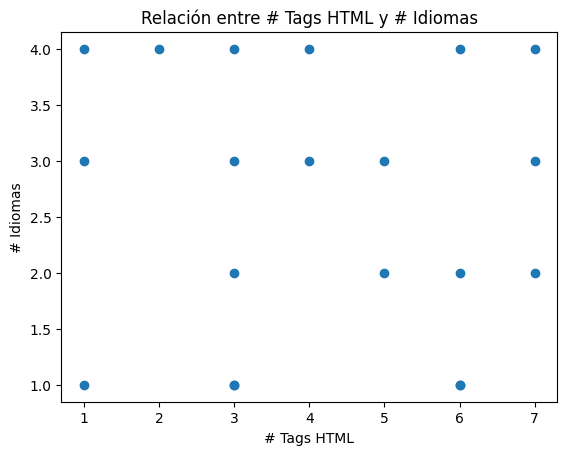

In [16]:
plt.scatter(df_igual['# Tags HTML'], df_igual['# Idiomas'])
plt.xlabel('# Tags HTML')
plt.ylabel('# Idiomas')
plt.title('Relación entre # Tags HTML y # Idiomas')
plt.show()

Entonces el algoritmo encontrara dos grupos uno de spam y otros de no spam, creando reglas y mejorando tecnicas de machine learning.

### APRENDIZAJE BATCH

Los sistemas basados en aprendizaje batch *no aprenden de manera incremental*, se entrenan utilizando todos los datos disponibles

Se cogen los datos y se pasa por el entrenamiento de algoritmo modificando las hipotesis, cambiando los datos por el tiempo y se pueden implementar en supervisados o no supervisados.

* Los sistemas basados en aprendizaje batch no aprenden de manera incremental, se entrenan utilizando todos los datos disponibles 
    * Si se desea que el sistema se adapte a un nuevo tipo de dato, se debe entrenar de nuevo con todos los datos disponibles 
    * Solución sencilla 
    * Funciona bien para sistemas que no requieren un conjunto de datos muy grande ni adaptarse a nuevos datos de manera muy rápida 
    * Muy restringido para dispositivos con una capacidad limitada de recursos, como un smartphone

### APRENDIZAJE ONLINE

* Los sistemas basados en aprendizaje online se entrenan incrementalmente, mediante el consumo incremental de datos, ya sea individuales o en pequeños grupos (mini-batches)

Lo que hace es que a lo largo del tiempo, a la ves que realiza predicciones realiza mejoras en el sistema como un aprendizaje.

* Los sistemas basados en aprendizaje online se entrenan incrementalmente, mediante el consumo incremental de datos, ya sea individuales o en pequeños grupos (mini-batches) 
    * Solución ideal para sistemas que reciben datos continuamente y requieren adaptarse a ellos de manera rápida 
    * Es capaz de lidiar con grandes conjuntos de datos que puede que no entren en una sola máquina 
    * Aparecen algunas variables importantes que hay que determinar, como el ratio de aprendizaje 
    * Pueden ser muy inestables si por alguna razón se consumen datos de baja calidad

### APRENDIZAJE BASADO EN INSTANCIAS

* El sistema aprende los ejemplos del conjunto de datos de entrenamiento y luego intenta generalizar para nuevos ejemplares
* Se requiere una medida de similitud

El aprendizaje basado en instancias es un enfoque en el que el sistema no construye un modelo explícito, sino que memoriza los ejemplos del conjunto de entrenamiento y utiliza una medida de similitud para realizar predicciones sobre nuevos datos. Cuando se presenta un nuevo ejemplo, el algoritmo compara sus características con las de los ejemplos almacenados y toma decisiones en función de los más similares.

Un ejemplo clásico de este método es el algoritmo k-Nearest Neighbors (k-NN), que clasifica una nueva instancia según la clase mayoritaria de sus vecinos más cercanos en el espacio de características. Este tipo de aprendizaje es útil cuando los datos presentan patrones complejos difíciles de modelar de forma paramétrica y cuando la similitud entre ejemplos es relevante para la tarea.

La principal ventaja es su simplicidad y capacidad para adaptarse rápidamente a nuevos datos, aunque puede ser ineficiente en términos de memoria y tiempo de cómputo cuando el conjunto de datos es muy grande.

### APRENDIZAJE BASADO EN MODELOS

* Se crea un modelo que describe el conjunto de datos y se utiliza para realizar predicciones
* Se requiere ajustar los parámetros del modelo

El aprendizaje basado en modelos implica construir una representación matemática o estadística que describe la relación entre las variables de entrada y salida de un conjunto de datos. Este modelo puede ser lineal, como la regresión lineal, o más complejo, como redes neuronales o árboles de decisión. El proceso consiste en ajustar los parámetros del modelo utilizando los datos de entrenamiento para minimizar el error de predicción.

Una vez entrenado, el modelo puede generalizar y realizar predicciones sobre nuevos datos no vistos. Este enfoque es fundamental en machine learning porque permite abstraer patrones y tendencias, facilitando la toma de decisiones automatizada y la interpretación de resultados. Además, los modelos pueden ser evaluados, ajustados y mejorados continuamente conforme se dispone de más datos, lo que los hace muy versátiles y potentes en aplicaciones reales.